This Notebook is based first on adapting the code on the following web page to explore our DC crime data:  

http://pbpython.com/simple-graphing-pandas.html


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
pd.__version__

'0.22.0'

In [17]:
%matplotlib inline

In [18]:
crimes=pd.read_csv("dc_crime2018423.csv",parse_dates=['START_DATE'])
crimes.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 32,7708.0,property,-76.955521,2016-10-04T16:37:29.000,motor vehicle theft,evening,135396.0,6.0,7,...,403859.0,3500 - 3526 block of minnesota avenue se,2016-10-04 16:09:08,16168699,motor vehicle theft,7B,2016-10-05T03:00:47.000Z,others,"38.886402972929169,-76.955523453842957",38.886395
1,cluster 4,100.0,property,-77.059614,2016-10-04T17:44:13.000,theft/other,evening,137194.0,2.0,2,...,394829.0,3000 - 3029 block of k street nw,2016-10-04 17:00:48,16168738,theft/other,2E,2016-10-05T01:36:11.000Z,others,"38.902593275715809,-77.059616752356732",38.902585
2,cluster 23,8904.0,property,-76.981924,2016-10-04T20:10:43.000,theft/other,evening,136987.0,5.0,5,...,401568.0,1500 - 1599 block of maryland avenue ne,2016-10-04 19:21:09,16168845,theft/other,5D,2016-10-05T02:21:19.000Z,others,"38.900742359981244,-76.981925885322667",38.900735
3,cluster 29,9601.0,violent,-76.937531,2016-10-14T00:12:56.000,robbery,midnight,138092.0,6.0,7,...,405418.0,1500 1535 block of 45th street ne,2016-10-13 22:45:39,16174401,robbery,7D,2016-10-14T05:31:03.000Z,gun,"38.910681288493713,-76.937533164068512",38.910673
4,cluster 25,10600.0,violent,-76.995538,2016-10-22T16:40:05.000,robbery,evening,137463.0,5.0,6,...,400387.0,700 - 799 block of florida avenue ne,2016-10-22 16:24:12,16180021,robbery,6C,2016-10-22T22:55:30.000Z,gun,"38.90503165003841,-76.995540557600265",38.905024


In [19]:
crimes.describe()

,CENSUS_TRACT,LONGITUDE,YBLOCK,DISTRICT,WARD,YEAR,PSA,ucr-rank,XBLOCK,CCN,LATITUDE
count,68891.000000,69047.000000,69047.000000,69024.000000,69047.000000,69047.000000,69018.000000,69047.000000,69047.000000,6.904700e+04,69047.000000
mean,6239.901439,-77.007812,137643.004474,3.666435,4.413153,2016.734992,371.193862,6.052892,399322.959791,1.685932e+07,38.906640
std,3109.058330,0.035928,3357.622141,1.952688,2.342396,0.671448,195.087980,1.300240,3116.131280,7.476037e+05,0.030245
min,100.000000,-77.113642,127300.000000,1.000000,1.000000,2016.000000,101.000000,1.000000,390147.000000,2.111617e+06,38.813471
25%,3600.000000,-77.031223,136128.000000,2.000000,2.000000,2016.000000,206.000000,6.000000,397293.000000,1.616979e+07,38.892979
50%,6900.000000,-77.012913,137611.000000,3.000000,5.000000,2017.000000,308.000000,6.000000,398880.000000,1.705153e+07,38.906338
75%,8904.000000,-76.985512,139596.000000,5.000000,6.000000,2017.000000,506.000000,7.000000,401257.000000,1.717364e+07,38.924239
max,11100.000000,-76.910021,147292.000000,7.000000,8.000000,2018.000000,708.000000,9.000000,407806.000000,8.501717e+07,38.993560


In [20]:
crimes['ucr-rank'].describe()

count    69047.000000
mean         6.052892
std          1.300240
min          1.000000
25%          6.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: ucr-rank, dtype: float64

In [21]:
crimes.dtypes

NEIGHBORHOOD_CLUSTER            object
CENSUS_TRACT                   float64
offensegroup                    object
LONGITUDE                      float64
END_DATE                        object
offense-text                    object
SHIFT                           object
YBLOCK                         float64
DISTRICT                       float64
WARD                             int64
YEAR                             int64
offensekey                      object
BID                             object
sector                          object
PSA                            float64
ucr-rank                         int64
BLOCK_GROUP                     object
VOTING_PRECINCT                 object
XBLOCK                         float64
BLOCK                           object
START_DATE              datetime64[ns]
CCN                              int64
OFFENSE                         object
ANC                             object
REPORT_DAT                      object
METHOD                   

In [22]:
crimetypes = crimes[['WARD','offensegroup','offense-text','offensekey','ucr-rank','OFFENSE','METHOD','START_DATE']]
crimetypes.head()

,WARD,offensegroup,offense-text,offensekey,ucr-rank,OFFENSE,METHOD,START_DATE
0,7,property,motor vehicle theft,property|motor vehicle theft,8,motor vehicle theft,others,2016-10-04 16:09:08
1,2,property,theft/other,property|theft/other,6,theft/other,others,2016-10-04 17:00:48
2,5,property,theft/other,property|theft/other,6,theft/other,others,2016-10-04 19:21:09
3,7,violent,robbery,violent|robbery,4,robbery,gun,2016-10-13 22:45:39
4,6,violent,robbery,violent|robbery,4,robbery,gun,2016-10-22 16:24:12


In [23]:
offense_group = crimetypes.groupby('OFFENSE')
offense_group.size()

OFFENSE
arson                             9
assault w/dangerous weapon     3943
burglary                       3471
homicide                        256
motor vehicle theft            5083
robbery                        4789
sex abuse                       619
theft f/auto                  22093
theft/other                   28784
dtype: int64

In [25]:
ucr_avg = offense_group.mean()
ucr_avg.sort_values(by='ucr-rank').head()

,WARD,ucr-rank
OFFENSE,,
homicide,6.359375,1.0
sex abuse,5.037157,2.0
assault w/dangerous weapon,5.654324,3.0
robbery,5.045939,4.0
burglary,4.965140,5.0


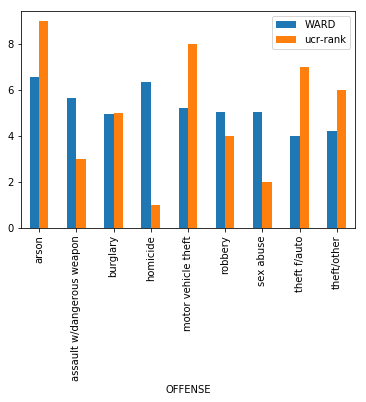

In [26]:
my_plot = ucr_avg.plot(kind='bar')

Text(0,0.5,'UCR Rank (1-9)')

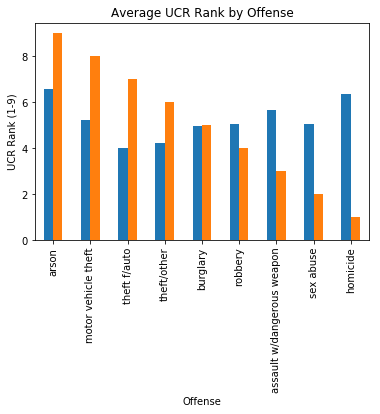

In [27]:
my_plot = ucr_avg.sort_values(by='ucr-rank',ascending=False).plot(kind='bar',legend=None,title="Average UCR Rank by Offense")
my_plot.set_xlabel("Offense")
my_plot.set_ylabel("UCR Rank (1-9)")

In [28]:
crimetypes = crimes[['offensegroup','WARD','ucr-rank','START_DATE']]
crimetypes.head()

,offensegroup,WARD,ucr-rank,START_DATE
0,property,7,8,2016-10-04 16:09:08
1,property,2,6,2016-10-04 17:00:48
2,property,5,6,2016-10-04 19:21:09
3,violent,7,4,2016-10-13 22:45:39
4,violent,6,4,2016-10-22 16:24:12


In [29]:
ward_group=crimetypes.groupby(['offensegroup','WARD']).mean()

In [63]:
ward_group.head(20)

ucr-rank
offensegroup WARD          
property     1     6.551977
             2     6.377454
             3     6.426696
             4     6.591125
             5     6.517702
             6     6.455884
             7     6.572192
             8     6.437781
violent      1     3.538608
             2     3.398438
             3     3.456790
             4     3.475032
             5     3.360337
             6     3.482959
             7     3.352701
             8     3.229736

In [30]:
ward_group.unstack().head()

ucr-rank                                                    \
WARD                 1         2         3         4         5         6   
offensegroup                                                               
property      6.551977  6.377454  6.426696  6.591125  6.517702  6.455884   
violent       3.538608  3.398438  3.456790  3.475032  3.360337  3.482959   

                                  
WARD                 7         8  
offensegroup                      
property      6.572192  6.437781  
violent       3.352701  3.229736

Text(0,0.5,'Average UCR Rank')

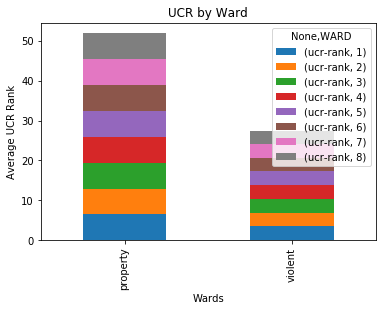

In [31]:
my_plot = ward_group.unstack().plot(kind='bar',stacked=True,title="UCR by Ward")
my_plot.set_xlabel("Wards")
my_plot.set_ylabel("Average UCR Rank")

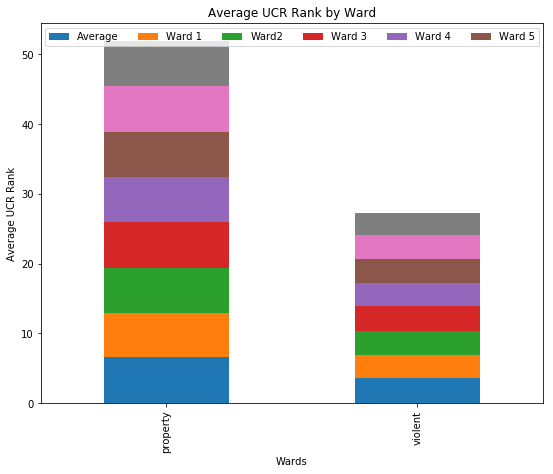

In [32]:
my_plot = ward_group.unstack().plot(kind='bar',stacked=True,title="Average UCR Rank by Ward",figsize=(9, 7))
my_plot.set_xlabel("Wards")
my_plot.set_ylabel("Average UCR Rank")
my_plot.legend(["Average","Ward 1","Ward2","Ward 3","Ward 4","Ward 5"], loc=9,ncol=6)


In [33]:
crime_patterns = crimes[['ucr-rank','START_DATE']]
crime_patterns.head()

,ucr-rank,START_DATE
0,8,2016-10-04 16:09:08
1,6,2016-10-04 17:00:48
2,6,2016-10-04 19:21:09
3,4,2016-10-13 22:45:39
4,4,2016-10-22 16:24:12


Text(0,0.5,'Number of Crimes')

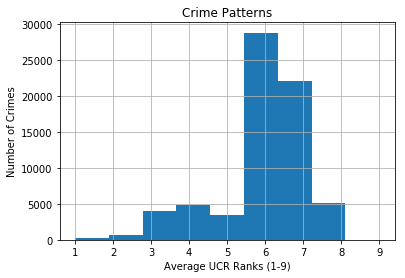

In [34]:
crime_plot = crime_patterns['ucr-rank'].hist(bins=9)
crime_plot.set_title("Crime Patterns")
crime_plot.set_xlabel("Average UCR Ranks (1-9)")
crime_plot.set_ylabel("Number of Crimes")

In [35]:
crime_patterns = crimes[['ucr-rank','START_DATE']]
crime_patterns.head(10)

,ucr-rank,START_DATE
0,8,2016-10-04 16:09:08
1,6,2016-10-04 17:00:48
2,6,2016-10-04 19:21:09
3,4,2016-10-13 22:45:39
4,4,2016-10-22 16:24:12
5,7,2016-10-22 20:21:52
6,6,2016-10-22 21:53:20
7,7,2016-10-23 01:30:55
8,7,2016-10-22 09:00:04
9,7,2016-11-01 08:30:07


In [81]:
crime_patterns.tail(20)

,ucr-rank,START_DATE
69027,7,2018-01-22 19:54:09
69028,8,2018-01-22 16:00:08
69029,7,2018-01-22 19:00:12
69030,4,2018-01-22 21:57:36
69031,4,2018-01-22 23:24:22
69032,3,2018-01-23 00:00:05
69033,7,2018-01-22 19:30:34
69034,6,2018-01-17 16:30:20
69035,7,2018-02-04 16:00:41
69036,6,2018-04-22 15:42:27


In [36]:
#Doesn't work for some reason
crime_patterns = crime_patterns.set_index('START_DATE')
crime_patterns.tail(12)

,ucr-rank
START_DATE,
2018-02-04 16:00:41,7
2018-04-22 15:42:27,6
2018-04-22 18:52:40,6
2018-04-22 18:59:44,6
2018-04-22 19:30:48,6
2018-04-22 20:52:44,6
2018-04-21 00:55:47,6
2018-04-19 10:29:27,6
2018-04-22 03:45:50,4


In [37]:
#Changing the sampling to year instead of month
crime_patterns.tail(200).resample('A',how=sum)

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


,ucr-rank
START_DATE,
2017-12-31,14
2018-12-31,1211


In [38]:
crime_patterns.resample('Y').mean() #not working for year end
crime_patterns.tail(12)

,ucr-rank
START_DATE,
2018-02-04 16:00:41,7
2018-04-22 15:42:27,6
2018-04-22 18:52:40,6
2018-04-22 18:59:44,6
2018-04-22 19:30:48,6
2018-04-22 20:52:44,6
2018-04-21 00:55:47,6
2018-04-19 10:29:27,6
2018-04-22 03:45:50,4


#try this - doesn't work
#https://stackoverflow.com/questions/41517127/python-pandas-resample-date-range?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
date_range = crime_patterns(start = '5/3/2005', periods =5+1, freq='1D')
new_date_range = crime_patterns.date_range(date_range.min(), date_range.max(), freq='30 min')

C:\Users\Judith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


AttributeError: 'AxesSubplot' object has no attribute 'tail'

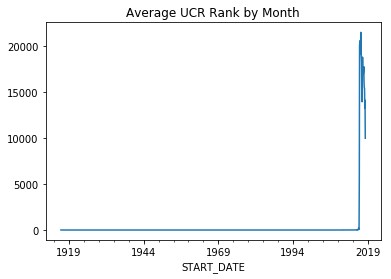

In [39]:
crime_plot = crime_patterns.resample('M',how=sum).plot(title="Average UCR Rank by Month",legend=None)
crime_plot.tail(10)

In [70]:
import psycopg2

In [71]:
con = psycopg2.connect("dbname='blockwise' user='postgres' password='purplerain'")
cur = con.cursor()

In [72]:
SQL = "SELECT * FROM location_crime;"
cur.execute(SQL)
rows = cur.fetchall()
con.close()

In [73]:
pprint.pprint(rows)

[('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'assault w/dangerous weapon',
  'violent',
  'gun',
  '3',
  '2018',
  '2018-01-21T06:17:06.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'assault w/dangerous weapon',
  'violent',
  'others',
  '3',
  '2016',
  '2016-08-11T15:29:31.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'assault w/dangerous weapon',
  'violent',
  'knife',
  '3',
  '2016',
  '2016-06-21T05:20:36.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'burglary',
  'property',
  'others',
  '5',
  '2017',
  '2017-06-06T17:01:14.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block

 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-04-17T02:37:36.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-04-16T21:02:48.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-04-16T19:06:32.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-04-09T15:40:56.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'the

  '2016',
  '2016-05-25T20:40:56.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-05-12T16:25:07.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-05-12T13:49:04.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-05-11T13:01:56.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669 block of pennsylvania avenue se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-05-02T01:25:47.000Z'),
 ('Barrel',
  '613 Pennsylvania Ave SE',
  'American (New)',
  Decimal('4.5'),
  '600 - 669

  '2017-12-24T04:08:20.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-12-21T16:16:24.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-12-18T20:06:46.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-12-16T01:21:55.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-11-29T16:13:19.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-11-26T17:13:52.000Z'),
 ('F

  '2017-02-15T19:37:06.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-02-12T22:50:24.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-02-11T23:44:47.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-02-08T15:00:37.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-02-08T14:16:34.000Z'),
 ('Farmbird',
  '625A H St NE',
  'Chicken Shop',
  Decimal('5'),
  '600 - 699 block of h street ne',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-02-04T21:43:37.000Z'),
 ('F

  '2018-01-10T19:55:50.000Z'),
 ("Grady's",
  '2210 14th St NW',
  'American (New)',
  Decimal('4.5'),
  '2200 - 2299 block of 14th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2017',
  '2017-12-27T19:32:34.000Z'),
 ("Grady's",
  '2210 14th St NW',
  'American (New)',
  Decimal('4.5'),
  '2200 - 2299 block of 14th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2017',
  '2017-07-11T03:07:18.000Z'),
 ("Grady's",
  '2210 14th St NW',
  'American (New)',
  Decimal('4.5'),
  '2200 - 2299 block of 14th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2016',
  '2016-08-25T20:25:14.000Z'),
 ("Grady's",
  '2210 14th St NW',
  'American (New)',
  Decimal('4.5'),
  '2200 - 2299 block of 14th street nw',
  'theft/other',
  'property',
  'others',
  '6',
  '2018',
  '2018-03-05T07:50:14.000Z'),
 ("Grady's",
  '2210 14th St NW',
  'American (New)',
  Decimal('4.5'),
  '2200 - 2299 block of 14th street nw',
  'theft/other',
  'property',
  'oth

  '2016',
  '2016-06-22T18:00:15.000Z'),
 ('Napoli Pasta Bar',
  '2737 Sherman Ave NW',
  'Italian',
  Decimal('4.5'),
  '2700 - 2799 block of sherman avenue nw',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-03-24T14:07:39.000Z'),
 ('Napoli Pasta Bar',
  '2737 Sherman Ave NW',
  'Italian',
  Decimal('4.5'),
  '2700 - 2799 block of sherman avenue nw',
  'theft/other',
  'property',
  'others',
  '6',
  '2017',
  '2017-03-13T13:43:24.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'burglary',
  'property',
  'others',
  '5',
  '2017',
  '2017-11-09T20:26:56.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'burglary',
  'property',
  'others',
  '5',
  '2016',
  '2016-06-24T18:27:17.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'burglary',
 

  '2016',
  '2016-09-24T20:36:05.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-09-20T20:41:11.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-09-11T00:20:57.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-09-02T23:53:20.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '700 - 799 block of 8th street se',
  'theft/other',
  'property',
  'others',
  '6',
  '2016',
  '2016-05-30T15:24:17.000Z'),
 ("Rose's Luxury",
  '717 8th St SE',
  'American (New)',
  Decimal('4.5'),
  '1 - 99 block of 8th street se',
  'theft/other',
  'property

  '7',
  '2016',
  '2016-12-19T06:21:00.000Z'),
 ('Unconventional Diner',
  '1207 9th St NW',
  'Diners',
  Decimal('4.5'),
  '1200 - 1299 block of 9th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2016',
  '2016-12-14T06:50:01.000Z'),
 ('Unconventional Diner',
  '1207 9th St NW',
  'Diners',
  Decimal('4.5'),
  '1200 - 1299 block of 9th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2016',
  '2016-12-07T02:05:50.000Z'),
 ('Unconventional Diner',
  '1207 9th St NW',
  'Diners',
  Decimal('4.5'),
  '1200 - 1299 block of 9th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2016',
  '2016-12-05T18:47:59.000Z'),
 ('Unconventional Diner',
  '1207 9th St NW',
  'Diners',
  Decimal('4.5'),
  '1200 - 1299 block of 9th street nw',
  'theft f/auto',
  'property',
  'others',
  '7',
  '2016',
  '2016-12-04T04:32:17.000Z'),
 ('Unconventional Diner',
  '1207 9th St NW',
  'Diners',
  Decimal('4.5'),
  '1200 - 1299 block of 9th street nw',
  't

In [74]:
for row in rows:  
    print("Business Name: ", row[0], "Category: ", row[2], "Rating: ", row[3], "Block: ", row[4], "Offense: ", row[5], "Offense Group: ", row[6])

Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  assault w/dangerous weapon Offense Group:  violent
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  assault w/dangerous weapon Offense Group:  violent
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  assault w/dangerous weapon Offense Group:  violent
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  burglary Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  burglary Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  burglary Offense Group:  property
Business Name

Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (New) Rating:  4.5 Block:  600 - 669 block of pennsylvania avenue se Offense:  theft/other Offense Group:  property
Business Name:  Barrel Category:  American (Ne

Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Off

Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Off

Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Offense Group:  property
Business Name:  Farmbird Category:  Chicken Shop Rating:  5 Block:  600 - 699 block of h street ne Offense:  theft/other Off

Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Rating:  4.5 Block:  700 - 799 block of 8th street se Offense:  theft/other Offense Group:  property
Business Name:  Rose's Luxury Category:  American (New) Ra

Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:  Diners Rating:  4.5 Block:  1200 - 1299 block of 9th street nw Offense:  theft f/auto Offense Group:  property
Business Name:  Unconventional Diner Category:

In [75]:
loc_crimes=pd.read_csv("location_crime_20180424.csv",parse_dates=['report_date'])
loc_crimes.head()

,business_name,address,category01,rating,block,offense,offense_group,method,ucrrank,year,report_date
0,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,gun,3,2018,2018-01-21 06:17:06
1,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,others,3,2016,2016-08-11 15:29:31
2,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,assault w/dangerous weapon,violent,knife,3,2016,2016-06-21 05:20:36
3,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,burglary,property,others,5,2017,2017-06-06 17:01:14
4,Barrel,613 Pennsylvania Ave SE,American (New),4.5,600 - 669 block of pennsylvania avenue se,burglary,property,others,5,2016,2016-08-10 08:30:50


In [76]:
loc_crimes.describe()

,rating,ucrrank,year
count,588.000000,588.000000,588.000000
mean,4.665816,6.119048,2016.693878
std,0.235600,0.742557,0.640616
min,4.500000,3.000000,2016.000000
25%,4.500000,6.000000,2016.000000
50%,4.500000,6.000000,2017.000000
75%,5.000000,6.000000,2017.000000
max,5.000000,8.000000,2018.000000


In [77]:
loc_crimes['ucrrank'].describe()

count    588.000000
mean       6.119048
std        0.742557
min        3.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: ucrrank, dtype: float64

In [78]:
loc_crimes.dtypes

business_name            object
address                  object
category01               object
rating                  float64
block                    object
offense                  object
offense_group            object
method                   object
ucrrank                   int64
year                      int64
report_date      datetime64[ns]
dtype: object

In [81]:
businesses = loc_crimes[['business_name','offense','ucrrank','report_date']]
businesses.head(20)

,business_name,offense,ucrrank,report_date
0,Barrel,assault w/dangerous weapon,3,2018-01-21 06:17:06
1,Barrel,assault w/dangerous weapon,3,2016-08-11 15:29:31
2,Barrel,assault w/dangerous weapon,3,2016-06-21 05:20:36
3,Barrel,burglary,5,2017-06-06 17:01:14
4,Barrel,burglary,5,2016-08-10 08:30:50
5,Barrel,burglary,5,2016-07-05 17:39:03
6,Barrel,burglary,5,2016-06-10 01:12:42
7,Barrel,motor vehicle theft,8,2018-01-10 06:48:18
8,Barrel,motor vehicle theft,8,2017-06-10 01:15:58
9,Barrel,robbery,4,2018-02-07 04:22:05


In [82]:
business_group = businesses.groupby('business_name')
business_group.size()

business_name
Barrel                  176
Farmbird                195
Grady's                  15
Honeysuckle              17
Napoli Pasta Bar         14
Rose's Luxury            43
The Alibi                 2
Tiki Taco                48
Unconventional Diner     78
dtype: int64

In [83]:
ucrrank_mean = business_group.mean()
ucrrank_mean.sort_values(by='ucrrank').head()

,ucrrank
business_name,
Barrel,5.892045
Grady's,5.933333
Farmbird,6.061538
Rose's Luxury,6.069767
Honeysuckle,6.176471


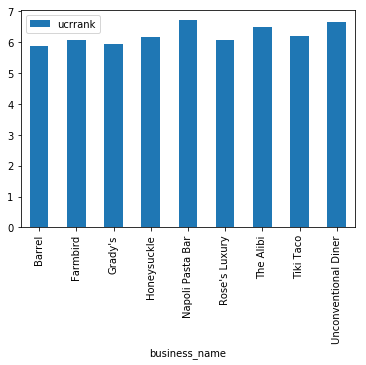

In [84]:
my_plot = ucrrank_mean.plot(kind='bar')

Text(0,0.5,'UCR Rank (1-9)')

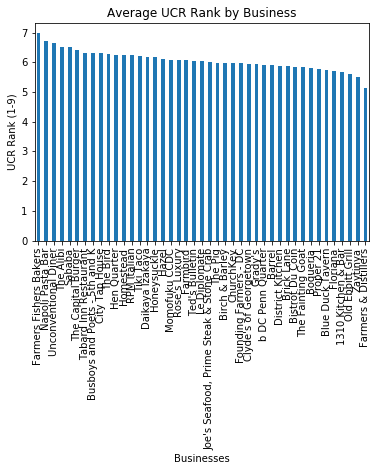

In [63]:
my_plot = ucrrank_mean.sort_values(by='ucrrank',ascending=False).plot(kind='bar',legend=None,title="Average UCR Rank by Business")
my_plot.set_xlabel("Businesses")
my_plot.set_ylabel("UCR Rank (1-9)")